# Data Wrangling and Exploratory Data Analysis

## Import Necessary Libraries

In [1]:
import numpy as np
import os, sys
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import itertools
import time
import random

import re

## English Dataset

This is the CEDAR dataset, which contains signatures by 55 people written in Latin script. Each person has 24 genuine and 24 forged signatures.

### Load Images

In [2]:
path = "./data/raw/CEDAR/"

In [3]:
# get list of all directories
dir_list = next(os.walk(path))[1]

In [4]:
dir_list.sort(key=int) # sort all of the directories from 1 to 55

In [5]:
print(dir_list)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55']


### Separate Originals and Forgeries

In [6]:
# create empty lists to separate originals vs forgeries
originals = []
forgeries = []

In [7]:
for folder in dir_list:
    images = os.listdir(path+folder)
    images.sort()
    images = [path+folder+'/'+x for x in images]
    forgeries.append(images[:24]) # First 24 images in each folder are forgeries
    originals.append(images[24:])

In [8]:
len(forgeries)

55

In [9]:
# forgeries 
## print and check that all the forged images were sorted correctly
## returns a list of lists containing image paths

### Visualize Original and Forged Signatures

In [10]:
originals_imgs = random.sample(originals[5], 2)
forgeries_imgs = random.sample(forgeries[5], 2)

In [11]:
originals_img1 = cv2.imread(originals_imgs[0], 0)
originals_img2 = cv2.imread(originals_imgs[1], 0)

forge_img1 = cv2.imread(forgeries_imgs[0], 0)
forge_img2 = cv2.imread(forgeries_imgs[1], 0)

Text(0.5, 1.0, 'Forged Signature 2')

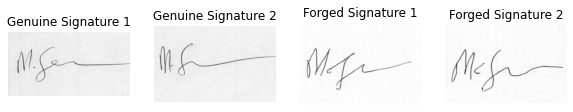

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 10))

ax1.imshow(originals_img1, cmap='gray')
ax1.axis('off')
ax1.set_title('Genuine Signature 1')

ax2.imshow(originals_img2, cmap='gray')
ax2.axis('off')
ax2.set_title('Genuine Signature 2')

ax3.imshow(forge_img1, cmap='gray')
ax3.axis('off')
ax3.set_title('Forged Signature 1')

ax4.imshow(forge_img2, cmap='gray')
ax4.axis('off')
ax4.set_title('Forged Signature 2')

A few observations are immediately apparent from looking at the above four images:

+ all the images are different sizes
+ there are different levels of contrast
+ the backgrounds are different colors, the genuines are darker than the forgeries

These are all issues that need to be addressed in the preprocessing phase of this project.